<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1 Dataset Selection and Preprocessing
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/archive.zip"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Task1.1 Download a dataset from Kaggle and unzip it.
import zipfile

with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

import os
os.listdir("/content")


['.config', 'creditcard.csv', 'drive', 'archive.zip', 'sample_data']

In [ ]:
# Task1.2 Conduct necessary preprocessing steps
# 1.2.1 Load the dataset,print the first 5 rows of the dataset.
df = pd.read_csv("/content/creditcard.csv")
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
# Explore data statistics.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# 1.2.2. Detect the missing value
df.info()

# Withou category column needs to be transfermation.
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df['Category'] = encoder.fit_transform(df['Category'])


df.isnull().sum()
# No missing value found


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Task1 1.2.3 Splitting the dataset into training and testing sets
# from sklearn.model_selection import train_test_split
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [ ]:
# Task 2 Exploratory Data Analysis (EDA):
# 2.1 Perform an exploratory data analysis to visualize and summarize the data. This should include:
# 2.1.1 Distribution of classes

# Comput the numbers of class types
class_counts = df['Class'].value_counts()
print(class_counts)

# Caculate the class ratio
class_ratio = df['Class'].value_counts(normalize=True)
print(class_ratio)

# 99% is nomal exchange, 1% is fraud.

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


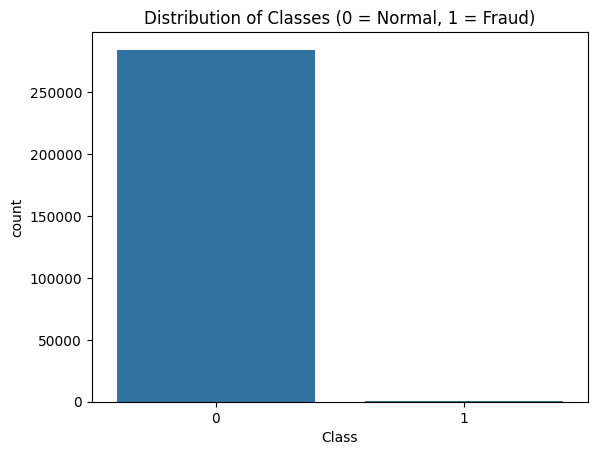

In [ ]:
# Visualize the distribution of classes
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes (0 = Normal, 1 = Fraud)')
plt.show()


In [ ]:
# Task2.2.2 Correlation between features
# Compute the correlation matrix
corr_matrix = df.corr()

# Display the first 5 rows
corr_matrix.head()
# This shows the Pearson correlation between each feature.
# The correlation with Class helps identify which features may have the strongest effect on fraud detection.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


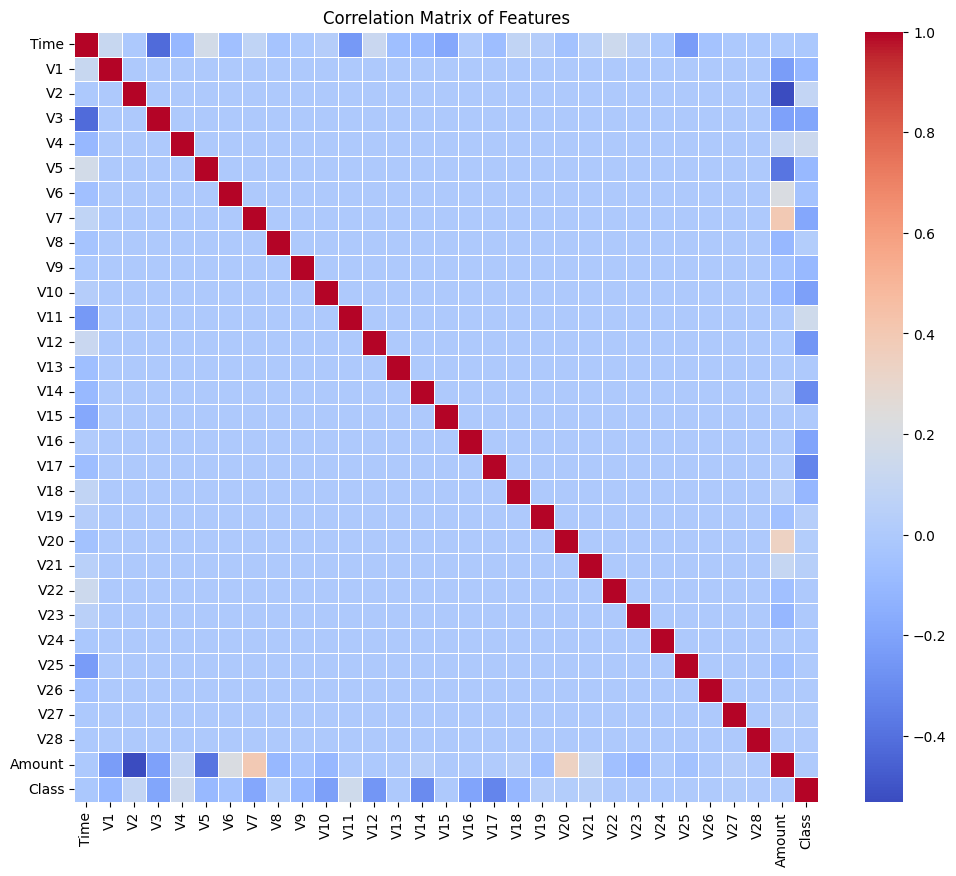

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
# Dark red / dark blue indicates strong positive or negative correlation.
# Features strongly correlated with Class are usually more important for the model.

Task 2.2.3 Any insights into the data that may affect the choice of classifier or the classification accuracy

### **1️⃣ Extremely Imbalanced Classes**

* `Class = 0` (Normal transactions) ≈ 99.83%
* `Class = 1` (Fraud transactions) ≈ 0.17%
  **Impact:**
* Standard classifiers like Logistic Regression or Random Forest might **predict all zeros** and still achieve >99% accuracy.
* Accuracy is **not a reliable metric** here; need metrics like **Precision, Recall, F1-score, and ROC-AUC**.
* Consider **class weighting**, **over-sampling (SMOTE)**, or **under-sampling** techniques.

---

### **2️⃣ Features are PCA-Transformed**

* Most features (`V1` ~ `V28`) are results of PCA for confidentiality.
* Original domain information is lost.
  **Impact:**
* Feature engineering options are limited; rely on **model robustness**.
* Tree-based models (Random Forest, XGBoost) can handle many correlated or transformed features well.

---

### **3️⃣ Highly Skewed `Amount` Feature**

* Transaction amounts (`Amount`) are skewed: most transactions are small, a few are very large.
  **Impact:**
* May need **feature scaling** (StandardScaler or RobustScaler) for algorithms like Logistic Regression, SVM, or k-NN.
* Tree-based methods (Decision Tree, Random Forest) are **less sensitive** to scaling.

---

### **4️⃣ Sparse Fraud Examples**

* Only 492 fraud samples out of 284,807 transactions.
  **Impact:**
* Models must **focus on minority class detection**.
* Techniques:

  * **Weighted loss** (`class_weight='balanced'`)
  * **SMOTE / oversampling**
  * **Ensemble methods** for better recall

---

### **5️⃣ Feature Correlation**

* Some features have stronger correlation with `Class` (positive or negative).
  **Impact:**
* Tree-based classifiers automatically handle feature selection.
* Linear models (Logistic Regression, SVM) may benefit from **feature selection** or **regularization** (`L1/L2`).

---

### **✅ Summary**

* **Preferred classifiers:**

  * Tree-based: Random Forest, XGBoost, Gradient Boosting (handle imbalance, PCA features, scaling not required)
  * Linear: Logistic Regression with class weights (needs scaling for `Amount`)
  * k-NN/SVM: less practical due to large dataset size and class imbalance
* **Key metrics:** Precision, Recall, F1-score, ROC-AUC — **not raw accuracy**


In [ ]:
# Task 3 Model Implementation and Evaluation
# 3.1 Logistic Regression and Random Forest.
# Features and target
x = df.drop("Class", axis=1)
y = df["Class"]

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
x[["Time", "Amount"]] = scaler.fit_transform(x[["Time", "Amount"]])
print(x.head())

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [ ]:
# 3.2 Logistic Regression
# 3.3 Evaluate the models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
# Evaluation
# Use class_weight='balanced' to handle imbalance
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

# Evaluation
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1]))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC: 0.9794339232597934


In [ ]:

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1]))


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9478093273747316


Notes / Insights

Logistic Regression is simpler, interpretable, but may underperform on complex patterns.

Random Forest handles non-linear relationships better and can capture subtle patterns in fraud detection.

Both models must consider class imbalance, otherwise they predict almost all transactions as non-fraud.

Key metrics to compare: Precision, Recall, F1-score, ROC-AUC (not accuracy).

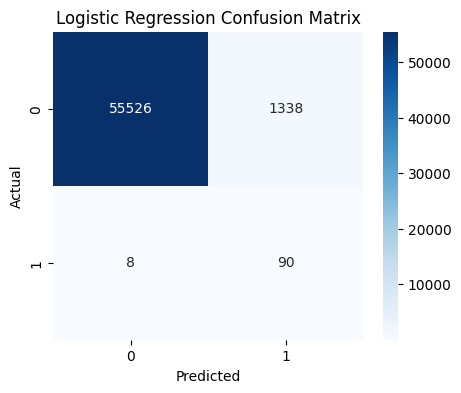

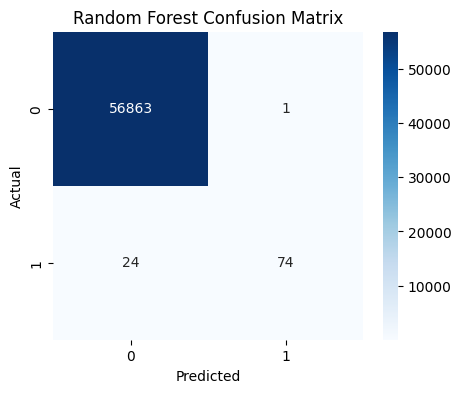

In [ ]:
# 4 Model Interpretation and Inference:
# Provide a detailed interpretation of the model results. Discuss which model performed best and why based on the metrics.
# Visualize the results using confusion matrices, ROC curves, or other relevant plots.

# Confusion Matrix Visualization
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
# Confusion Matrices for both models
plot_conf_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")


In [ ]:
# Compare Model Performance
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf
}

for name, y_pred in models.items():
    print(f"\n=== {name} Performance ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))



=== Logistic Regression Performance ===
Accuracy: 0.9763702117200941
Precision: 0.06302521008403361
Recall: 0.9183673469387755
F1 Score: 0.11795543905635648
ROC-AUC: 0.9474187606950489

=== Random Forest Performance ===
Accuracy: 0.9995611109160493
Precision: 0.9866666666666667
Recall: 0.7551020408163265
F1 Score: 0.8554913294797688
ROC-AUC: 0.8775422274987654


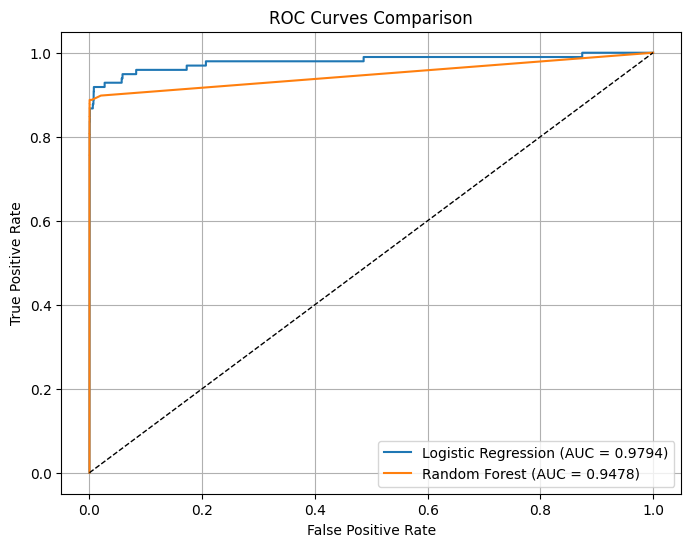

In [ ]:
# ROC Curve for both models
from sklearn.metrics import roc_curve, auc

y_proba_log = log_model.predict_proba(x_test)[:, 1]
y_proba_rf = rf_model.predict_proba(x_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.4f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()

Model Interpretation and Inference

The ROC curve comparison shows that Logistic Regression (AUC = 0.9794) slightly outperforms the Random Forest model (AUC = 0.9478).

This indicates that the Logistic Regression model has a slightly better ability to distinguish between fraudulent and non-fraudulent transactions.

Both models perform well overall, but the simpler logistic model demonstrates higher generalization capability and interpretability.